# Escoamento Potencial

Projeto *PyMech*


## Objetivo: Calcular o escoamento em torno da oval de Rankine 
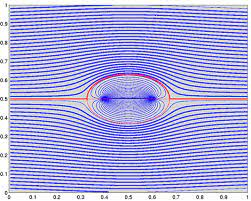


## Referências

> WHITE, Frank M. Fluid mechanics. 2016.

> Barba, Lorena A., Mesnard, Olivier (2019). Aero Python: classical aerodynamics of potential flow using Python. Journal of Open Source Education, 2(15), 45, https://doi.org/10.21105/jose.00045

## Bibliotecas

In [18]:
from numpy import *
import matplotlib.pyplot as plt

## Considerações:

Para que seja possível realizar os cálculos, vamos adotar algumas simplificações:
- Escoamento permanente
- Fluido incompressível ($Mach < 0.3$)
- Escoamento irrotacional ($\nabla \times V = 0$)
- Fluido invíscido ($\nu = 0$)

No campo, existirá um **potencial de velocidades** $\phi$, tal que 

$V = \nabla\phi \hspace{1cm} ou \hspace{1cm} u=\frac{\partial \phi}{\partial x};v=\frac{\partial \phi}{\partial y}$

Podemom, também, descrever o escoamento em termos da **função de corrente** $\psi$. A partir da condição da irrotacionalidade, temos que 

$ \nabla^2\psi = 0 \hspace{1cm} ou \hspace{1cm} \frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial y^2} = 0$

## Desenvolvimento dos cálculos
Os cálcos serão realizados em um domínio de espaço, onde são defindas as condições de contorno para o cálculo de corrente e potencial.

### Definição do domínio
Primeiramente, vamos definir o domínio do problema com a função ``meshgrid()``

In [19]:
N = 100                               # Número de pontos em cada eixo
x_start, x_end = -2.0, 2.0            # Fronteira em x
y_start, y_end = -1.0, 1.0            # Fronteira em y
x = linspace(x_start, x_end, N)    # Array para x
y = linspace(y_start, y_end, N)    # Array para y

X, Y = meshgrid(x, y)              # Malha

print('x = ', x)
print('y = ', y)

x =  [-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727

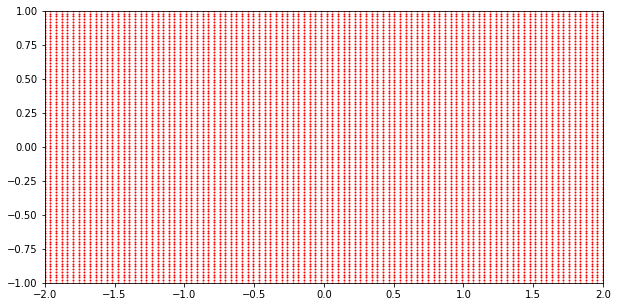

In [20]:
# Plot da malha

width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.scatter(X, Y, s=1, color='red')

plt.show()

### Fonte e sumidouro

Vamos considerar que um ponto tenha uma fonte de fluido, no qual o escoamento flui radialmente para fora. Por isso, vamos trabalhar com cooordenadas cilíndricas $(r,\theta)$ (o ângulo $\theta$ é $tan^{-1}(y/x)$). os componentes de velocidade são:

$  u_r(r,\theta)=\frac{\sigma}{2\pi r}; \hspace{1cm} u_\theta(r,\theta)=0 $

Onde $\sigma$ é a intensidade do escomaento.

Nós queremos obter $\psi$, que, trabalhando em coordenadas cilíndricas, é 

$ \frac{1}{r}\frac{\partial\psi}{\partial \theta} = u_r; \hspace{1cm} -\frac{\partial\psi}{\partial ra} = u_\theta $

Integrando

$ \psi = \frac{\sigma\theta}{2\pi} = \frac{\sigma}{2\pi}tan^{-1}(y/x) $

Como nosso domínio é definido em coordenadas retangulares, vamos obter o valor do campo de velocidade com

$ u = \frac{\partial \psi}{\partial y} = \frac{\sigma}{2\pi}\frac{x-x_{fonte}}{(x-x_{fonte})^2+(y-y_{fonte})^2} $

$ v = -\frac{\partial \psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y-y_{fonte}}{(x-x_{fonte})^2+(y-y_{fonte})^2} $

A função potencial de velocidades $\phi$ é dada por 

$ \phi = \frac{1}{4\pi}\sigma ln[(x-x_{fonte})^2+(y-y_{fonte})^2] $

In [21]:
def get_stream_function(strength, xs, ys, X, Y):

    psi = strength / (2 * pi) * arctan2((Y - ys), (X - xs))
    
    return psi

def get_velocity(strength, xs, ys, X, Y):

    u = strength / (2 * pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_potential_lines(strength, xs, ys, X, Y):

    phi = 1/(4*pi)*strength*log((X-xs)**2+(Y-ys)**2)
    
    return phi

Agora, plotando o resultado com a função ``streamplot()``

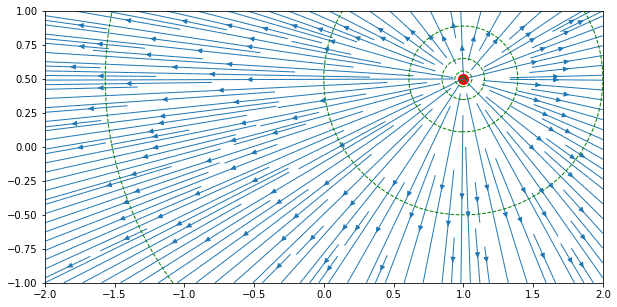

In [22]:
x_s , y_s = 1, 0.5 # Posição da fonte
strength = 1 # Intensidade da fonte

u, v = get_velocity(strength, x_s, y_s, X, Y)
phi = get_potential_lines(strength, x_s, y_s, X, Y)

# Plot
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Plot linhas de corrente
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1)

# Plot ponto da fonte
plt.scatter(x_s, y_s, color='red', s=100)

# Plot linhas Iso-potenciais
plt.contour(X, Y, phi, colors='green', linewidths=1, linestyles='--')

plt.show()

O mesmo pode ser feito para um **sumidouro**, em que a intensidade $\sigma$ é negativa.

In [27]:
# --- Fonte ---
strength_source = 10                      
x_source, y_source = 0.8, 0.5             

u_source, v_source = get_velocity(strength_source,x_source,y_source,X,Y)
phi_source = get_potential_lines(strength_source,x_source,y_source,X,Y)

# --- Sumidouro ---
strength_sink = -3.0        # No sumidouro, a intensidade é negativa              
x_sink, y_sink = -0.8, -0.5             

u_sink, v_sink = get_velocity(strength_sink,x_sink,y_sink,X,Y)
phi_sink = get_potential_lines(strength_sink,x_sink,y_sink,X,Y)

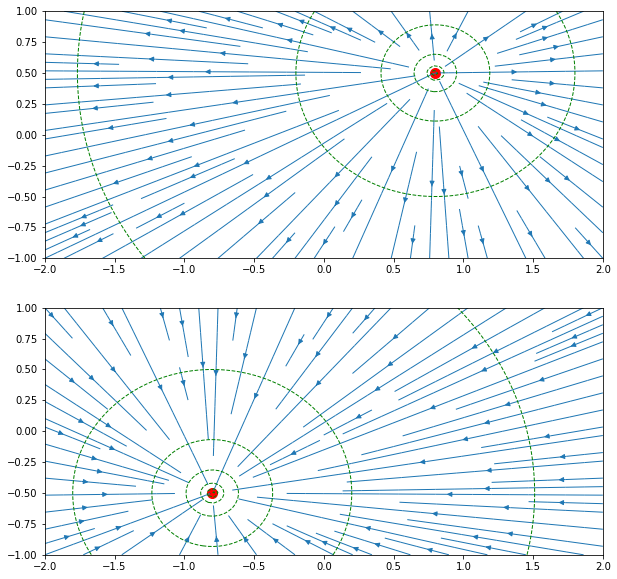

In [28]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
fig1, (ax1,ax2) = plt.subplots(2,1, figsize=(width,2*height))

ax1.set_xlim([x_start, x_end])
ax1.set_ylim([y_start, y_end])
ax1.streamplot(X, Y, u_source, v_source, density=1, linewidth=1, arrowsize=1)
ax1.scatter(x_source, y_source, color='red', s=100)
ax1.contour(X, Y, phi_source, colors='green', linewidths=1, linestyles='--')

ax2.set_xlim([x_start, x_end])
ax2.set_ylim([y_start, y_end])
ax2.streamplot(X, Y, u_sink, v_sink, density=1, linewidth=1, arrowsize=1)
ax2.scatter(x_sink, y_sink, color='red', s=100)
ax2.contour(X, Y, phi_sink, colors='green', linewidths=1, linestyles='--')

plt.show()

Como o sistema de equações é linear, é aplicável o princípio de *superposição*.

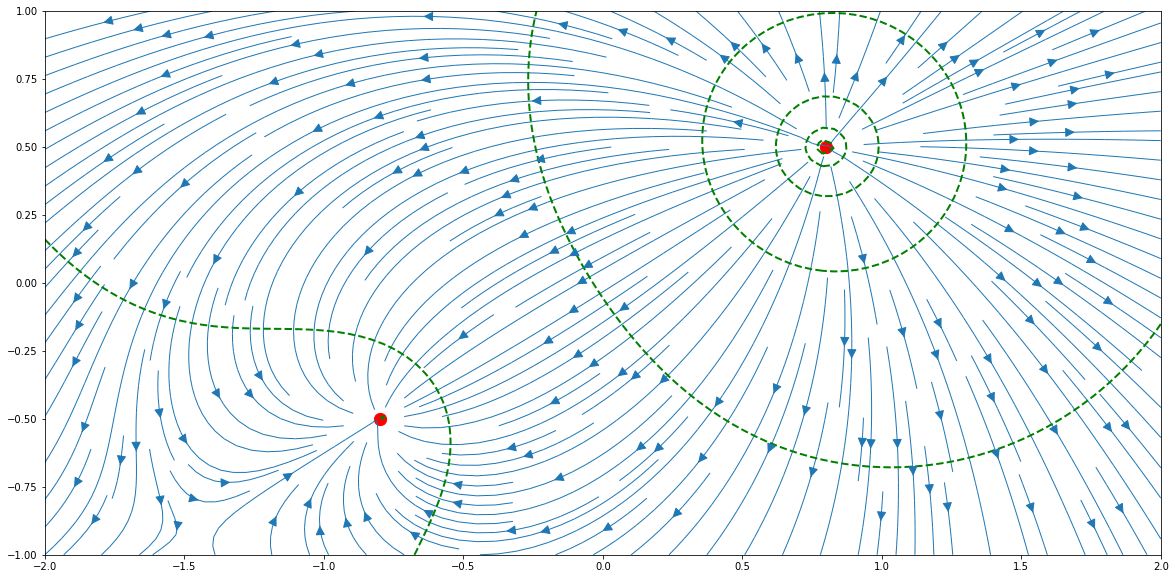

In [29]:
# Superposição 
u_res = u_source + u_sink
v_res = v_source + v_sink
phi_res = phi_sink + phi_source

# Plot
width = 20
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

plt.streamplot(X, Y, u_res, v_res,density=2, linewidth=1, arrowsize=2)
plt.scatter([x_source, x_sink], [y_source,y_sink], color='red', s=150);
plt.contour(X, Y, phi_res, colors='green', linewidths=2, linestyles='--');

### Corrente livre

Até agora, nós consideramos que o único potencial é gerado por fontes e sumidouros. Agora, vamos considerar também uma corrente livre, como o escoamento livre do ar.

In [30]:
# Gerando a malha

N = 500                               
x_start, x_end = -4.0, 4.0            
y_start, y_end = -2.0, 2.0            
x = linspace(x_start, x_end, N)    
y = linspace(y_start, y_end, N)   
X, Y = meshgrid(x, y)              

Essa corrente livre vai ser simplesmente dada por um conjunto de valores iguais no domínio.

In [32]:
u_inf = 1.0        # Velocidade da corrente

# Gerar dados de velocidade da corrente em u e v
u_freestream = u_inf * ones((N, N), dtype=float)
v_freestream = zeros((N, N), dtype=float)

# Função de corrente
psi_freestream = u_inf * Y

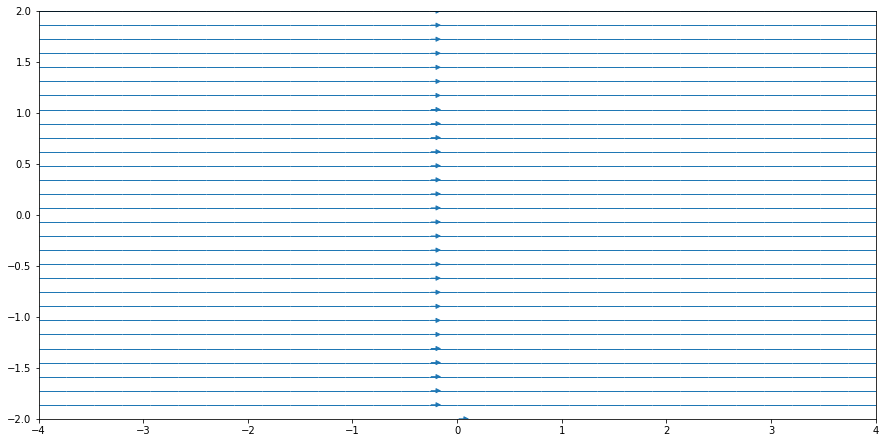

In [33]:
# PLot das linhas de corrente

width = 15
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_freestream, v_freestream, density=1, linewidth=1, arrowsize=1)

plt.show()

Assim como foi feito anteriormente, podemos usar a superposição para criar a interação da corrente livre com fontes e sumidouros. Assim

$ \psi = \psi_{corrente} + \psi_{fonte} = U_\infty y + \frac{\sigma}{2\pi}tan^{-1}(\frac{y-y_{fonte}}{x-x_{fonte}}) $

O ponto de estagnação é onde

$u=0; v=0$

In [36]:
strength_source = 5.0            # Intensidade da fonte
x_source, y_source = -1.0, 0.0   # Posição da fonte

# Campo de velocidade da fonte
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# Função de velocidade da fonte
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

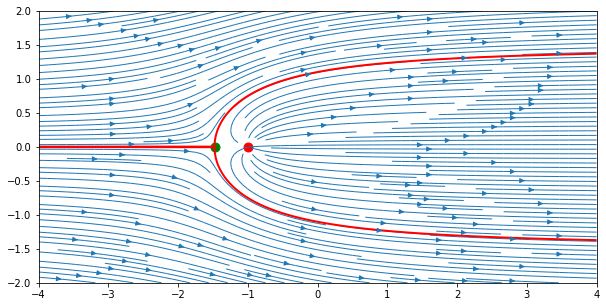

In [42]:
# Superposição da fonte e corrente livre
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# Plot
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Linas de corrente
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1)

# Ponto na fonte
plt.scatter(x_source, y_source, color='red', s=80)

# Calcular o ponto de estagnação (V = 0)
x_stagnation = x_source - strength_source / (2 *pi * u_inf)
y_stagnation = y_source

# Mostar o ponto de estagnação
plt.scatter(x_stagnation, y_stagnation, color='green', s=80)

# Mostrar a linha da divisão
plt.contour(X, Y, psi, levels=[-strength_source / 2, strength_source / 2], colors='red', 
            linewidths=2, linestyles='solid');

### Oval de Rankine

Como observado na interação da corrente livre com fontes e sumidouros, podemos descrever o escoamento em torno de um corpo.

In [44]:
strength_source = 3.0            # Intensidade da fonte
x_source, y_source = -1.0, 0.0   # localização da fonte 

# Campo de velocidade na fonte
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# Função corrente na fonte
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)


strength_sink = -3.0        # Intensidade do sumidouro
x_sink, y_sink = 1.0, 0.0   # Posição (x,y) do sumidouro 

# Campo de velocidade do sumidouro
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# Função corrente do sumidouro 
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

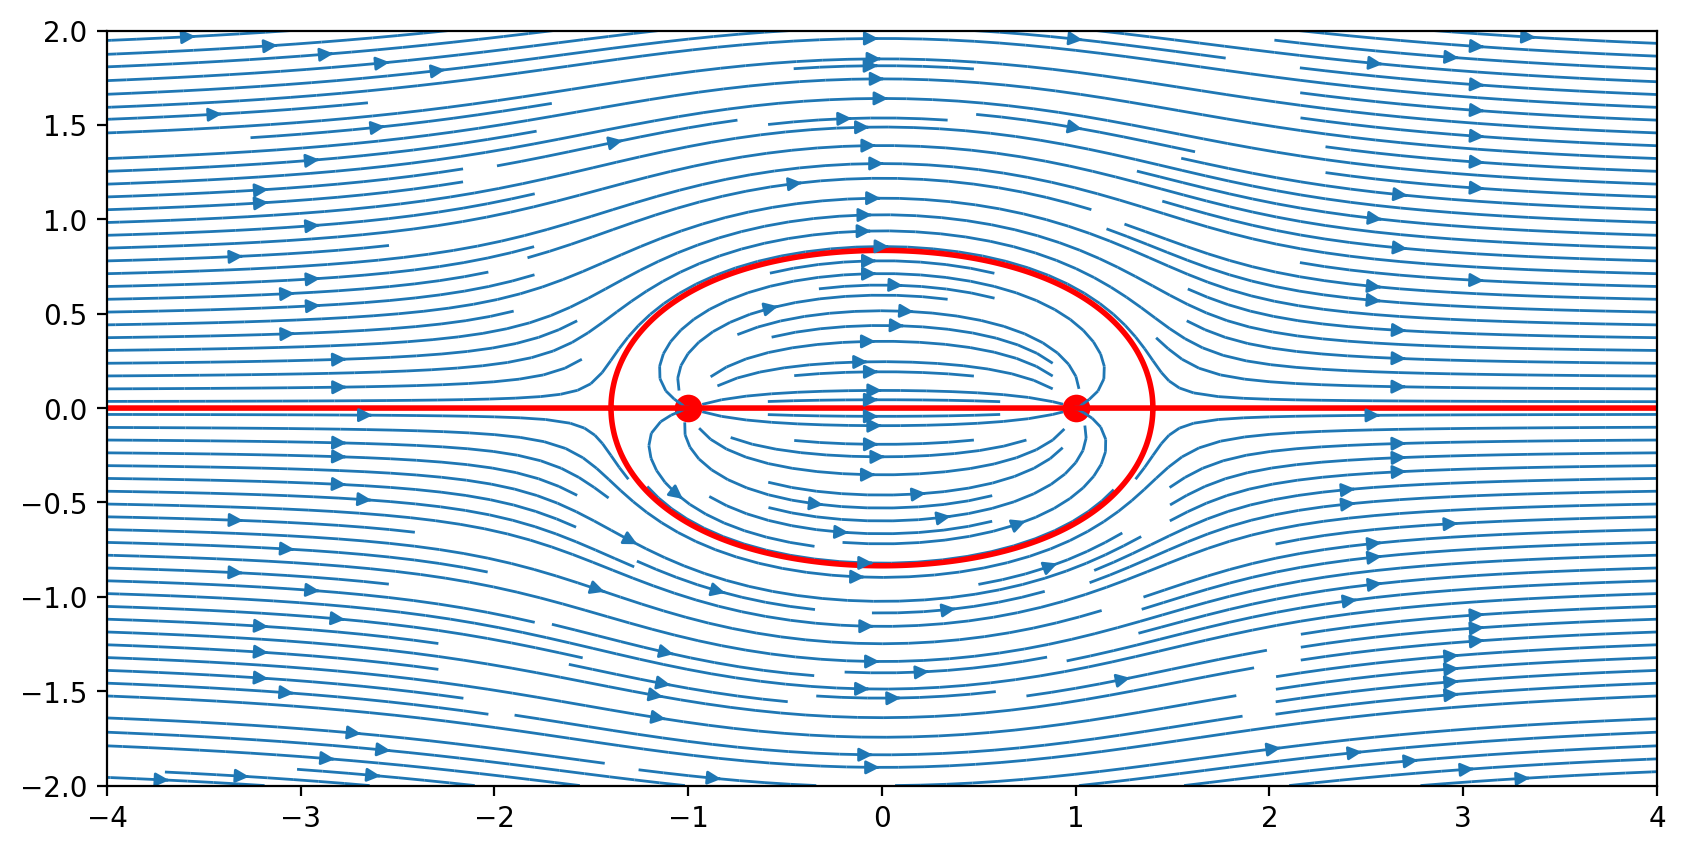

In [48]:
# Superposição
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# Plot
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height),dpi = 200)

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)



plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1)
plt.scatter([x_source, x_sink], [y_source, y_sink], color='red', s=80)
plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid')

plt.savefig('escoamento_oval.png')
plt.show()

### Campo de pressões

Outra aplicação interessante é observar a distribuição do coeficiente de pressão no escoamento ao redor do corpo.

Podemos fazer isso com a equação de Bernoulli (para um fluido incompressível).

$ p_\infty + \frac{1}{2} \rho V^2_\infty = p + \frac{1}{2}\rho V^2 $

O coeficiente de pressão $C_p$ é definido por

$ C_p = \frac{p-p_\infty}{\frac{1}{2}\rho V^2_\infty} $

Trabalhando com as equações, $C_p$ também pode ser escrito como

$C_p = 1- (\frac{V}{V_\infty})^2$

Esse campo de $C_p$ pode ser observado com a função ``contourf()``

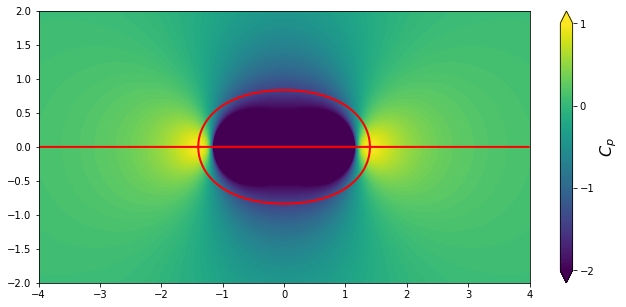

In [41]:
# Calculando Cp para todos os pontos
cp = 1.0 - (u**2 + v**2) / u_inf**2

# Plot
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

contf = plt.contourf(X, Y, cp, levels=linspace(-2.0, 1.0, 100), extend='both')

cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid');